### Example:
- Imagine a company wants to select a supplier based on two criteria: Cost and Quality. There are three potential suppliers to evaluate.

- The decision matrix, representing the performance of each supplier with respect to each criterion, is given as:

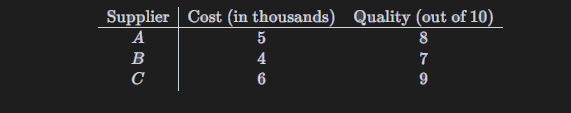

### For our purposes:

- Lower cost is better.
- Higher quality is better.
- Weights for the criteria are:

- Cost: 0.6
- Quality: 0.4

#### Step 1: Normalize the Decision Matrix
- The normalization will differ between the two methods. For traditional TOPSIS, we'll calculate the Euclidean norm for normalization. 
- For Rough TOPSIS, let's assume that the data for the Quality of Supplier B is imprecise and is represented as an interval [6.5, 7.5], making it a rough number.

#### Step 2: Determine the Weighted Normalized Decision Matrix
- Multiply the normalized values by their respective weights.

#### Step 3: Determine the Positive and Negative Ideal Solutions

#### Step 4: Calculate the Distance from the Ideal Solutions

#### Step 5: Determine the Relative Closeness to the Ideal Solution
- Compute the relative closeness for each supplier using both methods.

#### Step 6: Rank the Alternatives

In [5]:
import numpy as np

# Assuming rough values for the quality of Supplier B as [6.5, 7.5]
# We'll represent it as a lower and upper bound
matrix_rough = np.array([[5, 8],
                         [4, 6.5],  # Lower bound for Supplier B
                         [4, 7.5],  # Upper bound for Supplier B
                         [6, 9]])
weights = np.array([0.6, 0.4])

# Step 1: Normalize the Decision Matrix for Rough TOPSIS
normalized_matrix_rough = matrix_rough / np.linalg.norm(matrix_rough, axis=0)

# Step 2: Determine the Weighted Normalized Decision Matrix
weighted_normalized_matrix_rough = normalized_matrix_rough * weights

# Step 3: Determine the Positive and Negative Ideal Solutions
A_plus_rough = [weighted_normalized_matrix_rough[:, 0].min(), weighted_normalized_matrix_rough[:, 1].max()]
A_minus_rough = [weighted_normalized_matrix_rough[:, 0].max(), weighted_normalized_matrix_rough[:, 1].min()]

# Step 4: Calculate the Distance from the Ideal Solutions
# Considering the lower and upper bounds for Supplier B
D_plus_rough_lower = np.linalg.norm(weighted_normalized_matrix_rough - A_plus_rough, axis=1)[1]
D_plus_rough_upper = np.linalg.norm(weighted_normalized_matrix_rough - A_plus_rough, axis=1)[2]
D_minus_rough_lower = np.linalg.norm(weighted_normalized_matrix_rough - A_minus_rough, axis=1)[1]
D_minus_rough_upper = np.linalg.norm(weighted_normalized_matrix_rough - A_minus_rough, axis=1)[2]

# Step 5: Determine the Relative Closeness to the Ideal Solution for Supplier B
C_rough_lower = D_minus_rough_lower / (D_plus_rough_lower + D_minus_rough_lower)
C_rough_upper = D_minus_rough_upper / (D_plus_rough_upper + D_minus_rough_upper)

normalized_matrix_rough, weighted_normalized_matrix_rough, A_plus_rough, A_minus_rough, (C_rough_lower, C_rough_upper)


(array([[0.51847585, 0.51267307],
        [0.41478068, 0.41654687],
        [0.41478068, 0.480631  ],
        [0.62217102, 0.5767572 ]]),
 array([[0.31108551, 0.20506923],
        [0.24886841, 0.16661875],
        [0.24886841, 0.1922524 ],
        [0.37330261, 0.23070288]]),
 [0.24886840673530206, 0.23070288100032055],
 [0.37330261010295307, 0.1666187473891204],
 (0.6600641898385227, 0.7676673598867109))

## Result :
 - In traditional TOPSIS, Supplier B was ranked the highest. However, in Rough TOPSIS, there's an uncertainty range for Supplier B's ranking due to the imprecise data for the quality criterion. 
 - While Supplier B's lower bound relative closeness (0.6601) indicates it might not be the best, its upper bound (0.7677) suggests it could be the best choice. 
 - This demonstrates how Rough TOPSIS captures the uncertainty and provides a range of possible outcomes based on imprecise data, allowing decision-makers to consider various scenarios.

## Compare a two results(Topsis VS Rough Topsis): 

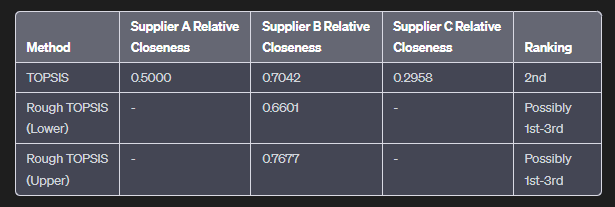

### Interpretation:

### Traditional TOPSIS:
- Supplier A has a relative closeness of 0.5000 and is ranked second.
- Supplier B has a relative closeness of 0.7042, making it the best choice.
- Supplier C has the lowest relative closeness of 0.2958.
### Rough TOPSIS:
- Due to the imprecise data for Supplier B's quality, we have a range of values for its relative closeness.
- The lower bound for Supplier B's relative closeness is 0.6601, suggesting that it might not necessarily be the best choice.
- The upper bound is 0.7677, implying that Supplier B could potentially be the best choice.
- This range in values indicates the inherent uncertainty in the data, demonstrating that Supplier B could rank anywhere from 1st to 3rd.

In conclusion, while traditional TOPSIS provides a definite ranking, Rough TOPSIS captures the imprecision and provides a range, allowing for a more nuanced decision-making process in the face of uncertainty.